# Shear Wave Splitting for the Novice

When a shear wave encounters an anisotropic medium, it splits its energy into orthogonally polarised wave sheets.  The effect is easily measured on waveforms with -- at least -- 2-component data (provided those 2 components are orthogonal to the wavefront vector, which can be different from the ray vector).  The key parameters are the polarisation of the wave fronts (which is captured by the parameter, $\phi$, which ca be defined as a vector in 3 dimensions, but in practice).  This angle is measured relative to some well-defined direction, e.g. North, or upwards, in the plane normal to the wave prop



## Splitting the signal

Let's start with two components. Put a pulse of energy and some noise on these components, with a polarisation of 40 degrees.  Note the pulse of energy is centred in the middle of the trace -- this is deliberate -- it is a feature of this software that analysis is always done at the centre of traces.

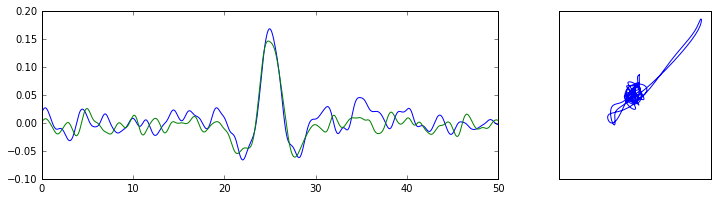

In [1]:
import sys
sys.path.append("..")
import splitwavepy as sw

import matplotlib.pyplot as plt
import numpy as np

data = sw.Pair(noise=0.05,pol=40,delta=0.1)
data.plot()


Now let's add a bit of splitting. Note, this shortens trace length slightly.  And the pulse is still at the centre.

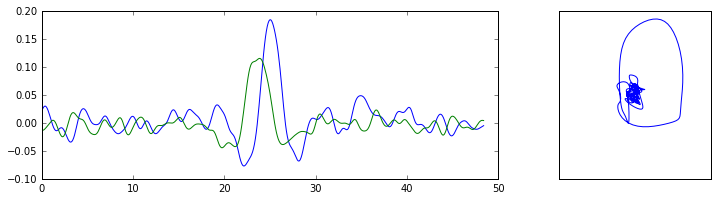

In [2]:
data.split(80,1.6)
data.plot()

We can undo the splitting, just to make sure it works.  Again, this shortens the trace, and the pulse is still at the centre.

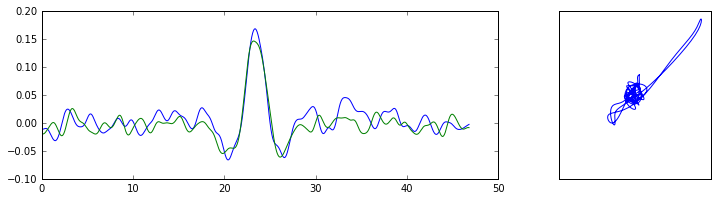

In [3]:
data.unsplit(80,1.6)
data.plot()

Let's start afresh, and this time put the splitting on straight away.

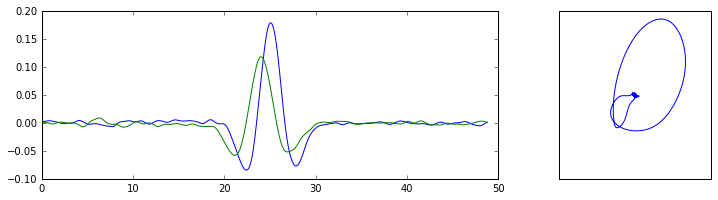

In [4]:
data = sw.Pair(delta=0.1,noise=0.01,pol=40,fast=80,lag=1.2)
data.plot()

## The window

The window should capture the power in the pulse of arriving energy in such a way as to maximise the signal to noise ratio.  It should also be wide enough to account for pulse broadening when splitting operators are applied to the data.


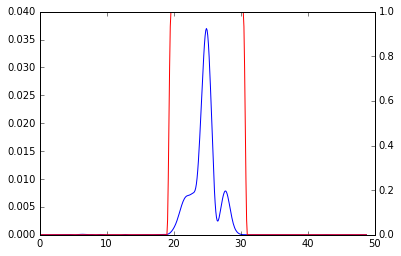

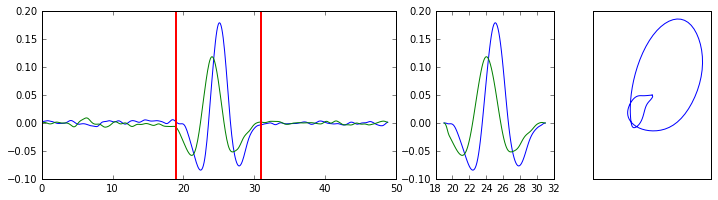

In [5]:
# plot power in signal
fig, ax1 = plt.subplots()
ax1.plot(data.t(),data.power())
# generate a window
window = data.window(25,12,tukey=0.1)
# window = sw.Window(data.centre(),150)
ax2 = ax1.twinx()
ax2.plot(data.t(),window.asarray(data.t().size),'r')
plt.show()
        
data.plot(window=window)

## The measurement



In [6]:
M = sw.EigenM(data,window=window)

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


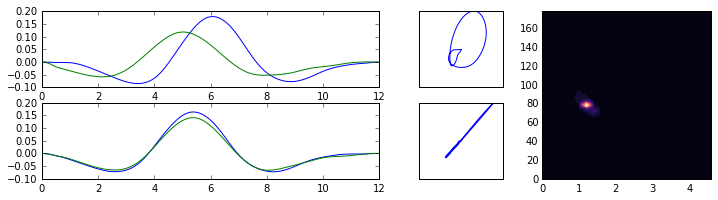

In [7]:
M.plot()

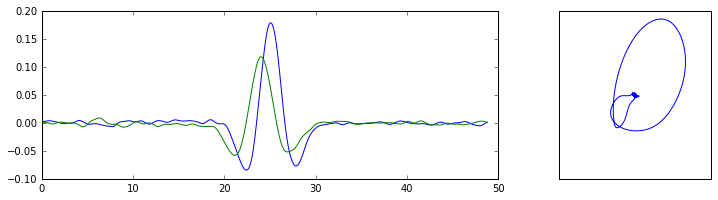

In [8]:
M.data.plot()

In [9]:
M = sw.EigenM(delta=0.1,noise=0.02,fast=60,lag=1.3,pol=120)
M.plot()

../splitwavepy/eigval/eigval.py:24: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.sort(np.linalg.eigvals(np.cov(data)))
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


LinAlgError: Array must not contain infs or NaNs

In [ ]:
from scipy import signal

In [ ]:
signal.tukey?

In [ ]:
p = sw.Pair()

In [ ]:
# p.plot()
import matplotlib.pyplot as plt
import numpy as np
plt.plot(p.data[0]**2+p.data[1]**2)
plt.show()

In [ ]:
data.t().shape

In [ ]:
window.width

In [ ]:
def test(a,b='yes'):
    print(a,b)

test('no','fuck')